In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [3]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu' ))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [4]:
model = model_fn()
model.summary()

/Users/chojungseok/Desktop/code/DAMF2/ML/DL/DLvenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.7597 - loss: 0.6961
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8554 - loss: 0.4084
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3610
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.8800 - loss: 0.3390
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8875 - loss: 0.3168


In [6]:
result.history.keys()

dict_keys(['accuracy', 'loss'])

In [7]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])
plt.legend(['accuracy', 'loss'])

ModuleNotFoundError: No module named 'matplotlib'

In [20]:
result = model.fit(train_scaled, train_target, epochs = 20)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9072 - loss: 0.2648
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9075 - loss: 0.2633
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9109 - loss: 0.2580
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9125 - loss: 0.2491
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9146 - loss: 0.2463
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9148 - loss: 0.2390
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9190 - loss: 0.2338
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9186 - loss: 0.2332
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9237 - loss: 0.2256
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9242 - loss: 0.2205
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9237 - loss: 0.2180
Epoch 12/20
1407/1407 ━━━━━━━━

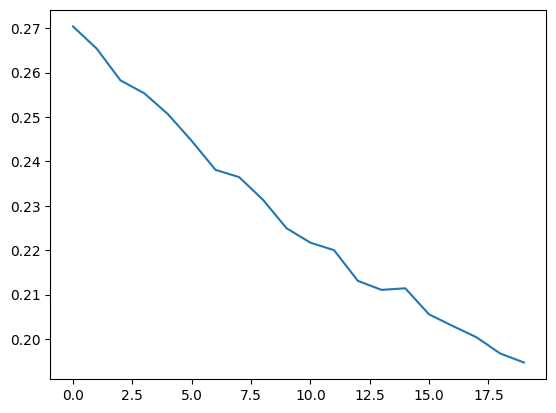

In [22]:
plt.plot(result.history['loss'])

In [23]:
model = model_fn()
model.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7629 - loss: 0.6811 - val_accuracy: 0.8435 - val_loss: 0.4477
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8534 - loss: 0.4088 - val_accuracy: 0.8511 - val_loss: 0.4070
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8728 - loss: 0.3576 - val_accuracy: 0.8709 - val_loss: 0.3606
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8788 - loss: 0.3358 - val_accuracy: 0.8732 - val_loss: 0.3728
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8876 - loss: 0.3161 - val_accuracy: 0.8652 - val_loss: 0.3909
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8902 - loss: 0.3050 - val_accuracy: 0.8741 - val_loss: 0.3632
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8944 - loss: 0.2925 - val_accuracy: 0.8819 - val_loss: 0.3546
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8985 - loss: 0.2874 

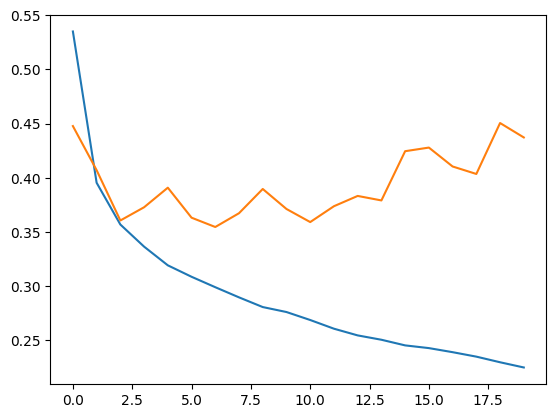

In [27]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [29]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7664 - loss: 0.6796 - val_accuracy: 0.8475 - val_loss: 0.4354
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8535 - loss: 0.4092 - val_accuracy: 0.8591 - val_loss: 0.3881
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8706 - loss: 0.3597 - val_accuracy: 0.8725 - val_loss: 0.3584
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8775 - loss: 0.3365 - val_accuracy: 0.8701 - val_loss: 0.3583
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8881 - loss: 0.3047 - val_accuracy: 0.8701 - val_loss: 0.3510
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8902 - loss: 0.2948 - val_accuracy: 0.8769 - val_loss: 0.3433
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8994 - loss: 0.2720 - val_accuracy: 0.8715 - val_loss: 0.3507
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8996 - loss: 0.2654

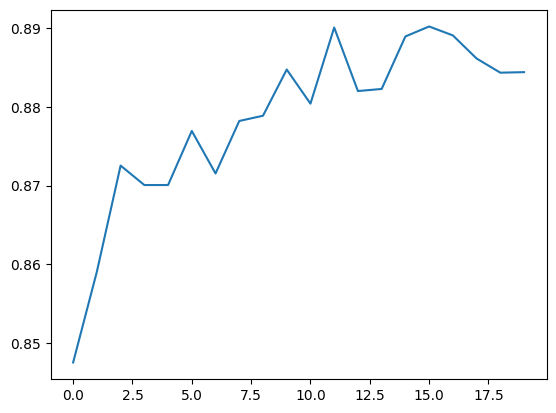

In [30]:
plt.plot(result.history['val_accuracy'])

## 규제
1. drop out
2.

In [32]:
## dropout
model = model_fn(keras.layers.Dropout(0.3))

In [33]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result = model.fit(train_scaled, train_target,epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7219 - loss: 0.7888 - val_accuracy: 0.8325 - val_loss: 0.4575
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8338 - loss: 0.4604 - val_accuracy: 0.8563 - val_loss: 0.3910
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8495 - loss: 0.4177 - val_accuracy: 0.8643 - val_loss: 0.3730
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8613 - loss: 0.3800 - val_accuracy: 0.8628 - val_loss: 0.3711
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8619 - loss: 0.3753 - val_accuracy: 0.8717 - val_loss: 0.3489
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8718 - loss: 0.3532 - val_accuracy: 0.8735 - val_loss: 0.3488
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8730 - loss: 0.3465 - val_accuracy: 0.8743 - val_loss: 0.3447
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8767 - loss: 0.3315 -

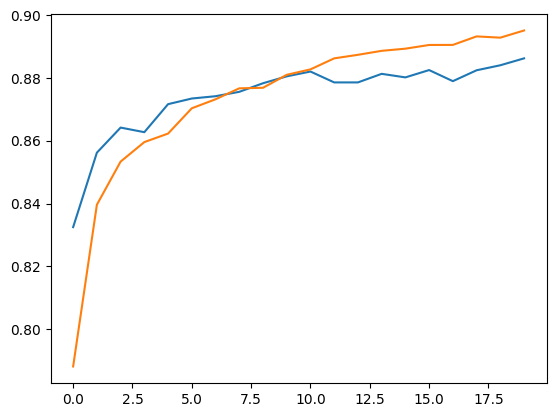

In [36]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

In [38]:
model.save_weights('my_model.weights.h5')

In [39]:
model.save('my_model.keras')

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cp = keras.callbacks.ModelCheckpoint('best_model.keras', # 모델의 파일 명
                                     save_best_only = True #성능이 가장 좋은것 하나만 저장한다
                                     )

es = keras.callbacks.EarlyStopping(patience = 2)

result = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target),
                   callbacks = [cp, es]) # 손실율이 올라갈때까지 학습을 하고 올라가기 직전의 포인트를 저장한다.


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7225 - loss: 0.7937 - val_accuracy: 0.8403 - val_loss: 0.4382
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8405 - loss: 0.4468 - val_accuracy: 0.8495 - val_loss: 0.4021
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8494 - loss: 0.4107 - val_accuracy: 0.8637 - val_loss: 0.3707
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8551 - loss: 0.3909 - val_accuracy: 0.8644 - val_loss: 0.3689
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8640 - loss: 0.3708 - val_accuracy: 0.8732 - val_loss: 0.3517
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8675 - loss: 0.3554 - val_accuracy: 0.8605 - val_loss: 0.3809
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8731 - loss: 0.3429 - val_accuracy: 0.8741 - val_loss: 0.3490
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8763 - loss: 0.3326

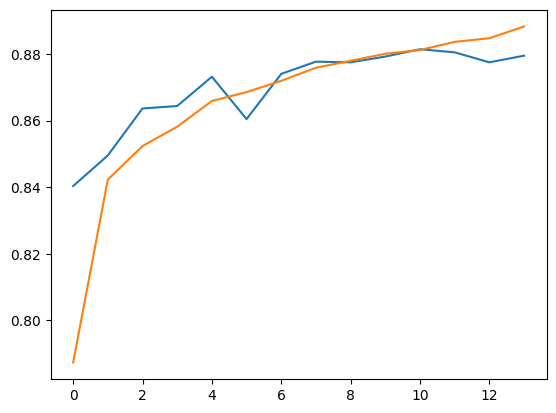

In [42]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

In [44]:
# 합성곱(CNN) 신경망의 목적은 이미지 학습을 할때 비슷한 부위끼리 묶어서 학습
# 패딩 데이터의 각 테두리에 빈 칸을 추가하여 학습하는 횟수는 늘어나지만 각 셀마다 학습에 참여하는 횟수는 동일해 진다.
# 스트라이드 한칸씩 진행하는 것이 아니라 n칸씩 건너 뛰는것을 말한다
# 컬러의 경우 데이터의 크기가 더 커진다 -> 데이터 자체가 3차원이 되기 떄문이다
